In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.3)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

분류 :  ['a' 'a'] 

(array([[4.        , 4.47213595, 6.08276253, 8.06225775],
       [1.41421356, 3.16227766, 5.        , 6.40312424]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]], dtype=int64))
test_data(2,7)와 (10,8)data와의 거리 :  8.06225774829855


[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]


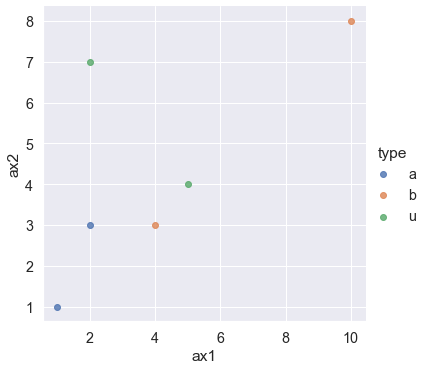

In [2]:
X=pd.DataFrame([[1,1],[2,3],[4,3],[10,8]], columns=['ax1','ax2'])
y=pd.DataFrame(['a','a','b','b'], columns=['type'])

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

X_test=pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred=knn.predict(X_test)
print('분류 : ', pred, '\n')
print(knn.kneighbors(X_test, 4))

from math import sqrt
print('test_data(2,7)와 (10,8)data와의 거리 : ', sqrt((2-10)**2+(7-8)**2))
sample=pd.concat([X.join(y), X_test])
sample.reset_index(inplace=True)
sample.drop('index', axis=1, inplace=True)
sample.fillna('u', inplace=True)

sns.lmplot('ax1','ax2',data=sample, hue='type', fit_reg=False);

print('\n')
print(knn.predict_proba(X_test))

분류 :  ['a' 'a'] 

(array([[4., 6., 7., 9.],
       [2., 4., 7., 9.]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]], dtype=int64))


[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]


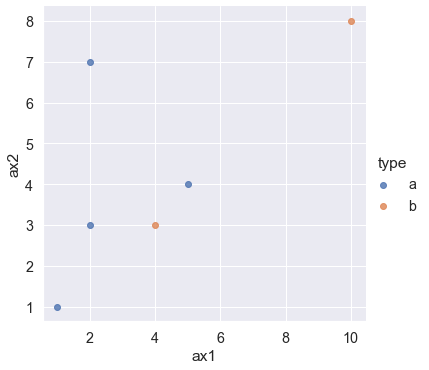

In [3]:
knn=KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan')
knn.fit(X, y)

X_test=pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred=knn.predict(X_test)
print('분류 : ', pred, '\n')

print(knn.kneighbors(X_test, 4))

sample=pd.concat([X.join(y), X_test.join(pd.DataFrame(pred, columns=['type']))])
sample.reset_index(inplace=True)
sample.drop('index', axis=1, inplace=True)
sample.fillna('u', inplace=True)

sns.lmplot('ax1','ax2',data=sample, hue='type', fit_reg=False);

print('\n')
print(knn.predict_proba(X_test))

분류 :  ['a' 'a'] 

(array([[4., 6., 7., 9.],
       [2., 4., 7., 9.]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]], dtype=int64))


[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]


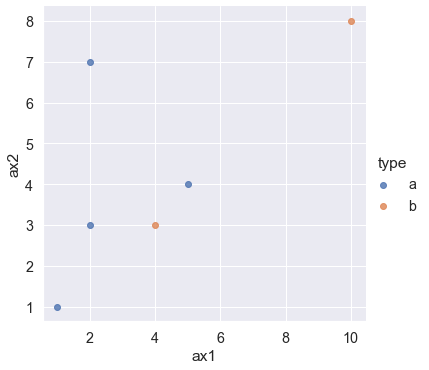

In [4]:
knn=KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan')
knn.fit(X, y)

X_test=pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred=knn.predict(X_test)
print('분류 : ', pred, '\n')

print(knn.kneighbors(X_test, 4))

sample=pd.concat([X.join(y), X_test.join(pd.DataFrame(pred, columns=['type']))])
sample.reset_index(inplace=True)
sample.drop('index', axis=1, inplace=True)
sample.fillna('u', inplace=True)

sns.lmplot('ax1','ax2',data=sample, hue='type', fit_reg=False);

print('\n')
print(knn.predict_proba(X_test))

분류 :  ['a' 'a'] 

(array([[4.        , 4.47213595, 6.08276253, 8.06225775],
       [1.41421356, 3.16227766, 5.        , 6.40312424]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]], dtype=int64))


[[0.5 0.5]
 [0.5 0.5]]


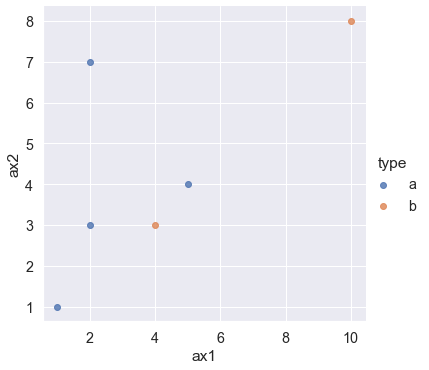

In [5]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

X_test=pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred=knn.predict(X_test)
print('분류 : ', pred, '\n')

print(knn.kneighbors(X_test, 4))

sample=pd.concat([X.join(y), X_test.join(pd.DataFrame(pred, columns=['type']))])
sample.reset_index(inplace=True)
sample.drop('index', axis=1, inplace=True)
sample.fillna('u', inplace=True)

sns.lmplot('ax1','ax2',data=sample, hue='type', fit_reg=False);

print('\n')
print(knn.predict_proba(X_test))

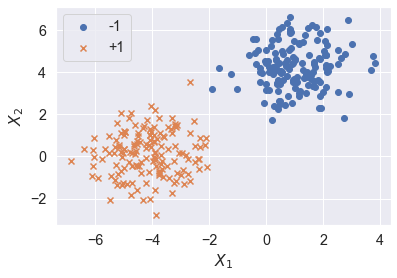

In [6]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X, y=make_blobs(n_samples=300, n_features=2, centers=2, random_state=3, cluster_std=1)

y=2*y-1

plt.scatter(X[y==-1, 0], X[y==-1, 1], marker='o', label='-1')
plt.scatter(X[y==+1, 0], X[y==+1, 1], marker='x', label='+1')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.show()

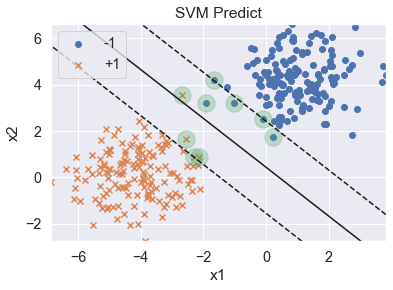

In [7]:
from sklearn.svm import SVC
import numpy as np

model=SVC(kernel='linear', C=0.1).fit(X,y)

xmin=X[:, 0].min()
xmax=X[:, 0].max()
ymin=X[:, 1].min()
ymax=X[:, 1].max()

xx=np.linspace(xmin, xmax, 10)
yy=np.linspace(ymin, ymax, 10)
X1, X2=np.meshgrid(xx, yy)

Z=np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1=val
    x2=X2[i, j]
    p=model.decision_function([[x1,x2]])
    Z[i, j]=p[0]

levels=[-1, 0, 1]
linestyles=['dashed','solid','dashed']
plt.scatter(X[y==-1, 0], X[y==-1, 1], marker='o', label='-1')
plt.scatter(X[y==+1, 0], X[y==+1, 1], marker='x', label='+1')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s=300, alpha=0.3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('SVM Predict')

plt.show()


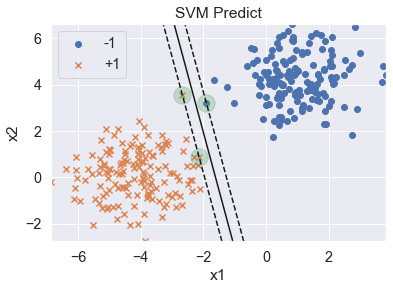

In [8]:
model=SVC(kernel='linear', C=10).fit(X,y)

xmin=X[:, 0].min()
xmax=X[:, 0].max()
ymin=X[:, 1].min()
ymax=X[:, 1].max()

xx=np.linspace(xmin, xmax, 10)
yy=np.linspace(ymin, ymax, 10)
X1, X2=np.meshgrid(xx, yy)

Z=np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1=val
    x2=X2[i, j]
    p=model.decision_function([[x1,x2]])
    Z[i, j]=p[0]

levels=[-1, 0, 1]
linestyles=['dashed','solid','dashed']
plt.scatter(X[y==-1, 0], X[y==-1, 1], marker='o', label='-1')
plt.scatter(X[y==+1, 0], X[y==+1, 1], marker='x', label='+1')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s=300, alpha=0.3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('SVM Predict')

plt.show()

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

vo_clf=VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=145)

vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9386


In [11]:
classifiers=[lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred=classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9211


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('./features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    
    return new_feature_name_df

def get_human_dataset():
    feature_name_df = pd.read_csv('./features.txt', sep = '\s+', header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('./X_train.txt', sep='\s+', names = feature_name)
    X_test = pd.read_csv('./X_test.txt', sep = '\s+', names = feature_name)
    y_train = pd.read_csv('./y_train.txt', sep='\s+', header=None, names = ['action'])
    y_test = pd.read_csv('./y_test.txt', sep = '\s+', header=None, names = ['action'])
    
    return X_train, X_test, y_train, y_test

column_index    42
dtype: int64


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test=get_human_dataset()

In [14]:
dt_clf=DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('DecisionTreeClassifier 예측 정확도 : {0:.4f}'.format(accuracy))

DecisionTreeClassifier 예측 정확도 : 0.8595


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('RandomForestClassifier 예측 정확도 : {0:.4f}'.format(accuracy))

RandomForestClassifier 예측 정확도 : 0.9253


In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
params={'n_estimators':[100], 'max_depth':[6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}

rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적의 하이퍼 파라미터 : \n ', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼 파라미터 : 
  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9180


In [23]:
rt_clf1=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rt_clf1.fit(X_train, y_train)
pred=rt_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9165


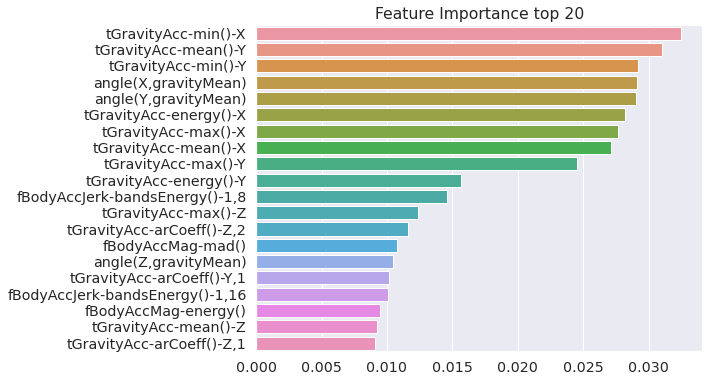

In [25]:
ftr_importances_values=rt_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importance top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
df=pd.read_csv('./iris.csv')
X=df.drop(['species'], axis=1)
y=df['species']

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)

print('knn training set 정확도 : ', knn.score(X_train, y_train))
print('knn test set 정확도 : ', accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)

knn training set 정확도 :  0.95
knn test set 정확도 :  1.0


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

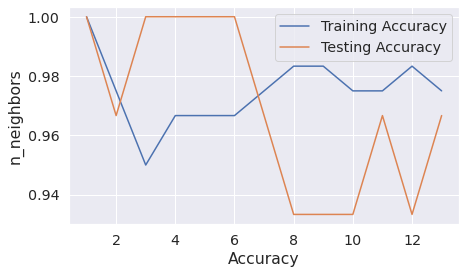

In [43]:
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1, 14)

for n_neighbors in neighbors_settings:
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train, y_train)
  training_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(7, 4))
plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('n_neighbors')
plt.legend(loc='bottom right')

In [44]:
grid_params={'n_neighbors':[3,5,7,9], 'weights':['uniform','distance'], 'metric':['euclidean','manhatten']}
gs=GridSearchCV(knn, grid_params, cv=3)
gs_results=gs.fit(X_train, y_train)
gs_results.best_estimator_
scores_df=pd.DataFrame(gs_results.cv_results_)

In [48]:
print(scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']].sort_values(by=['rank_test_score']).head())

                                              params  ...  split2_test_score
4  {'metric': 'euclidean', 'n_neighbors': 7, 'wei...  ...              0.950
5  {'metric': 'euclidean', 'n_neighbors': 7, 'wei...  ...              0.975
7  {'metric': 'euclidean', 'n_neighbors': 9, 'wei...  ...              0.975
2  {'metric': 'euclidean', 'n_neighbors': 5, 'wei...  ...              0.975
3  {'metric': 'euclidean', 'n_neighbors': 5, 'wei...  ...              0.975

[5 rows x 6 columns]


In [49]:
params=scores_df['params'][scores_df['rank_test_score']==1]
print('\n')
for i in range(len(params)):
  print(params.iloc[i])



{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [51]:
from sklearn.svm import SVC

svm=SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
pred=svm.predict(X_test)

print('SVM training set 정확도 : ', svm.score(X_train, y_train))
print('SVM test set 정확도 : ', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)

SVM training set 정확도 :  0.9916666666666667
SVM test set 정확도 :  1.0


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [52]:
df=pd.read_csv('./iris.csv')

X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

X_train, X_test, y_train, y_test=train_test_split(X, y)

y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [54]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
dt_accuracy=accuracy_score(y_test, dt_pred)
print('의사결정나무 training set 정확도 : ', dt_clf.score(X_train, y_train))
print('의사결정나무 test set 정확도 : ', dt_accuracy)

의사결정나무 training set 정확도 :  1.0
의사결정나무 test set 정확도 :  0.9210526315789473
